## Importando bibliotecas

In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon, Point, LineString, MultiPolygon
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Lendo e entendendo os arquivos

In [2]:
rj_estado = gpd.read_file("33MUE250GC_SIR.shp")
rj_estado

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."
...,...,...,...,...
87,1555,3306008,TRÊS RIOS,"POLYGON ((-43.13666 -22.10933, -43.13182 -22.1..."
88,1556,3306107,VALENÇA,"POLYGON ((-43.82120 -22.08844, -43.82101 -22.0..."
89,1557,3306156,VARRE-SAI,"POLYGON ((-41.82695 -20.84164, -41.82686 -20.8..."
90,1558,3306206,VASSOURAS,"POLYGON ((-43.61208 -22.30841, -43.61113 -22.3..."


In [3]:
type(rj_estado)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

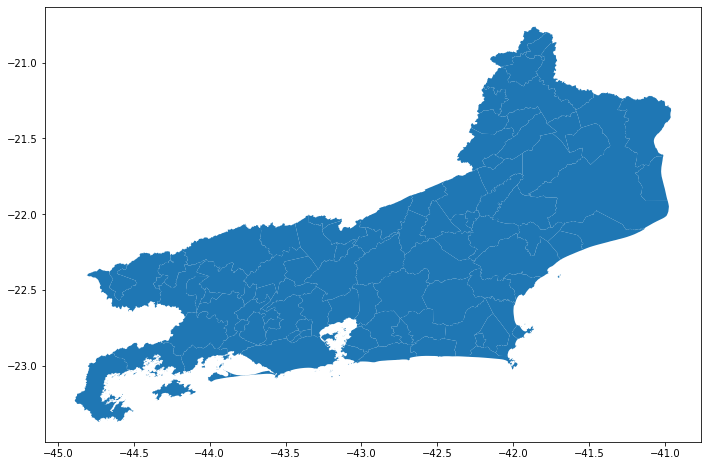

In [4]:
rj_estado.plot(figsize=(15,8))

## Entendendo funcionamento do Geometry

<AxesSubplot:>

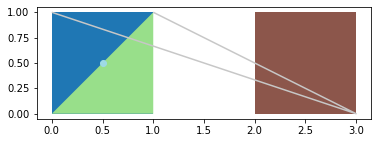

In [5]:
p1 = Polygon([(0,0), (1,0), (1,1), (0,1)])
p2 = Polygon([(0,0), (1,0), (1,1)])
p3 = Polygon([(2,0), (3,0), (3,1), (2,1)])
p4 = LineString([(0,1), (3,0), (1,1)])
p5 = Point(0.5, 0.5)

g = gpd.GeoSeries([p1,p2, p3, p4, p5])
g.plot(cmap="tab20")

In [6]:
dir = "../GeoPandas - GeoPandas Parte 1/mapas/RJ-MUNIC"
if not os.path.exists(dir):
    os.makedirs(dir)

In [7]:
rj_munic = rj_estado[rj_estado["NM_MUNICIP"] == "RIO DE JANEIRO"]
rj_munic.to_file("../GeoPandas - GeoPandas Parte 1/mapas/RJ-MUNIC/rj_munic.shp")
#selecionando da base de dados, apenas os dados que são do município do rio de janeiro

In [8]:
rj_munic = gpd.read_file("../GeoPandas - GeoPandas Parte 1/mapas/RJ-MUNIC/rj_munic.shp")
rj_munic

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12380..."


<AxesSubplot:>

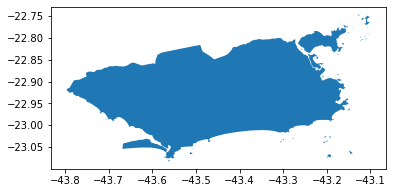

In [9]:
rj_munic.plot()

In [10]:
dados = pd.read_table("dados.txt")
dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000


In [11]:
geometry = [Point(x) for x in zip(dados.Longitude, dados.Latitude)]
#criando um objeto iterável a partir dos dados de latitude e longitude e iterando sobre eles parar gerar uma lista de "points" do geometry.

<AxesSubplot:>

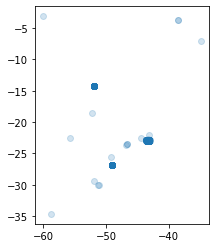

In [12]:
crs = {'proj':'latlong', 'ellps': 'WGS84','datum': 'WGS84', 'no_defs': True}
#site para encontrar o crs: https://spatialreference.org/
geo_dados = gpd.GeoDataFrame(dados, crs = crs, geometry = geometry)
geo_dados.plot(alpha=0.2)

In [13]:
rj_munic.crs

{'init': 'epsg:4674'}

In [14]:
rj_munic = rj_munic.to_crs("+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs")
rj_munic.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

In [15]:
geo_dados.crs

{'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}

In [16]:
geo_dados = geo_dados.to_crs("+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs")
geo_dados.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

<AxesSubplot:>

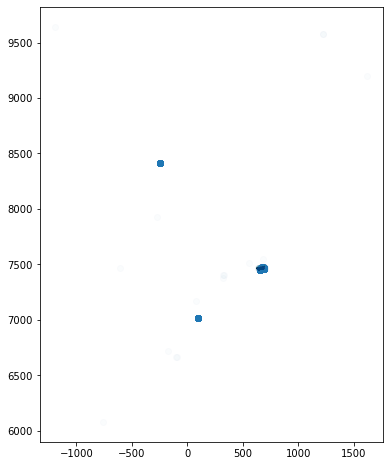

In [17]:
base = rj_munic.plot(color="black", edgecolor="black", figsize=(15,8))
geo_dados.plot(ax=base, figsize=(15,8), alpha=0.02)

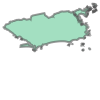

In [18]:
rj_munic.iloc[0].geometry

In [19]:
geo_dados[geo_dados["geometry"].within(rj_munic.iloc[0].geometry)]

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284)
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216)
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944)
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848)
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417)


In [20]:
antes = geo_dados.shape[0]
antes

5000

In [21]:
geo_dados = geo_dados[geo_dados["geometry"].within(rj_munic.iloc[0].geometry)]
depois = geo_dados.shape[0]
depois

4513

<AxesSubplot:>

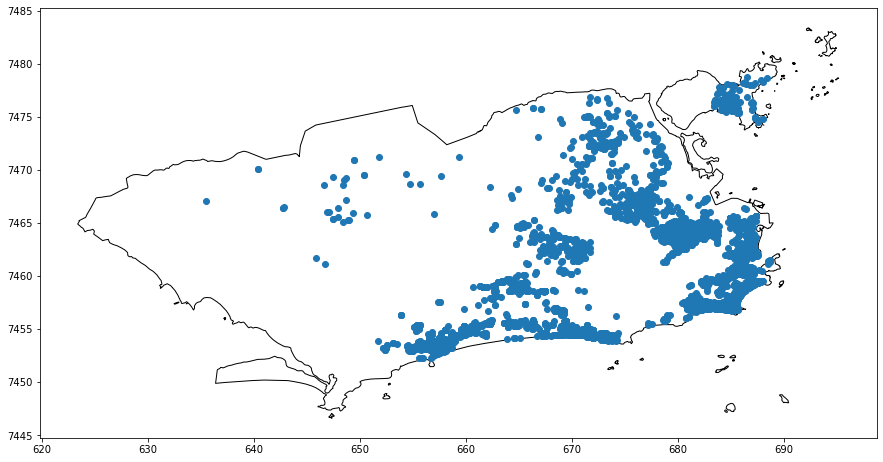

In [22]:
base = rj_munic.plot(color="white", edgecolor="black", figsize=(15,8))
geo_dados.plot(ax=base, figsize=(15,8), alpha=1)

In [23]:
geo_dados.to_file("../GeoPandas - GeoPandas Parte 1/mapas/RJ-MUNIC/dataset.shp")
geodados = gpd.read_file("../GeoPandas - GeoPandas Parte 1/mapas/RJ-MUNIC/dataset.shp")

In [24]:
geodados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284)
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216)
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944)
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848)
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417)


## Referências

In [25]:
metro = gpd.read_file("Esta%C3%A7%C3%B5es_Metr%C3%B4.geojson")

In [26]:
metro

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (-43.36485 -22.80662)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.35845 -22.81627)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34964 -22.82452)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34326 -22.83148)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.33386 -22.84269)
5,6,6,Irajá,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.32329 -22.84795)
6,7,7,Vicente de Carvalho,1,1.0,0.0,0,1,None,1,...,0,0,1,Transcarioca,0,None,0,None,1996,POINT (-43.31306 -22.85406)
7,8,8,Tomaz Coelho,0,0.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1996,POINT (-43.30676 -22.86240)
8,9,9,Engenho da Rainha,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1991,POINT (-43.29741 -22.86785)
9,10,10,Inhauma,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1983,POINT (-43.28337 -22.87456)


In [27]:
metro.crs

{'init': 'epsg:4326'}

In [28]:
metro = metro.to_crs("+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs")
metro.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

<AxesSubplot:>

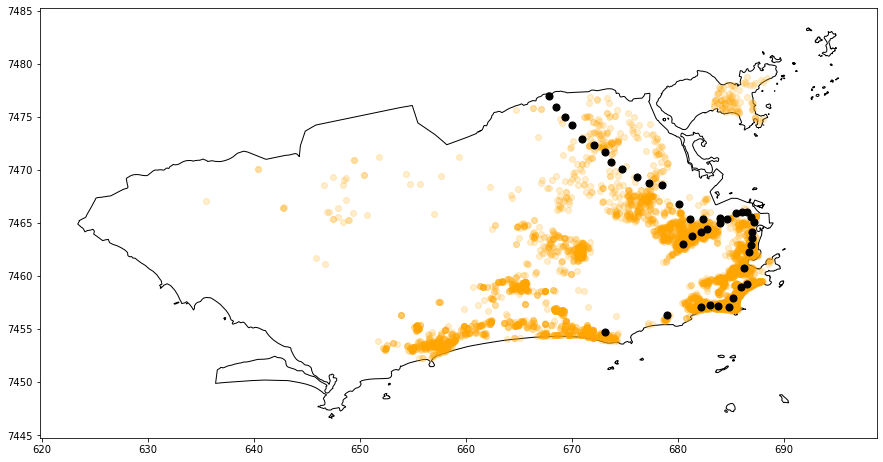

In [29]:
base = rj_munic.plot(color="white", edgecolor="black", figsize=(15,8))
geo_dados.plot(ax=base,color= "orange", alpha=0.2)
metro.plot(ax=base,color= "black", markersize=50)

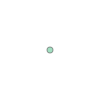

In [30]:
geodados.iloc[0].geometry

In [31]:
distancias = metro.distance(geodados.iloc[0].geometry)

In [32]:
type(distancias)

pandas.core.series.Series

In [33]:
distancias

0     25.321516
1     24.623350
2     24.224237
3     23.881158
4     23.357575
5     23.523396
6     23.658163
7     23.401048
8     23.644084
9     24.209373
10    24.795188
11    25.596665
12    26.033173
13    26.295764
14    27.398579
15    28.659654
16    25.773027
17    26.716983
18    27.377518
19    30.455326
20    31.034097
21    31.466395
22    31.662650
23    31.695780
24    31.232661
25    31.026518
26    30.727260
27    30.401336
28    29.515734
29    29.476829
30    28.850631
31    29.407590
32    27.940690
33    28.901631
34    27.475584
35    24.743520
36    26.507063
37    25.728350
38    24.822792
39    21.589055
40    15.622939
dtype: float64

In [34]:
min(distancias)

15.62293882499506

In [35]:
geodados["dist_metro"] = geodados["geometry"].apply(lambda x: metro.distance(x).min())

In [36]:
geodados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,dist_metro
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.622939
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530741
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.736973
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.718039
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.131159


In [37]:
geodados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,dist_metro
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641
dist_metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000


In [41]:
estações_brt = gpd.read_file("https://opendata.arcgis.com/datasets/f753941f44a749d4987f1111aa6486b3_22.geojson")

In [40]:
trem = gpd.read_file("https://opendata.arcgis.com/datasets/8c9f264be1e946b1b49cf4c198bd5e46_16.geojson")

In [42]:
trem

,OBJECTID,Cod,Nome,Flg_IntegraOnibus,Flg_IntegraMetro,Flg_Terminal,Flg_TransfRamal,Flg_TransfCentral,Flg_IntegraTele,Flg_Mun,...,Flg_Deodoro,Flg_SantaCruz,Flg_Japeri,Flg_Paracambi,Flg_VilaInhomirim,Flg_Guapimirim,Data_Inc,Integra_BRT,Corredor_BRT,geometry
0,1,60,Nova Iguaçu,NaN,NaN,1.0,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,1970-01-01T00:00:00+00:00,NaN,None,POINT (-43.44939 -22.76073)
1,2,20,Comendador Soares,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,1970-01-01T00:00:00+00:00,NaN,None,POINT (-43.48895 -22.74415)
2,3,4,Austin,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,1970-01-01T00:00:00+00:00,NaN,None,POINT (-43.52271 -22.72031)
3,4,81,Queimados,NaN,NaN,1.0,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,1970-01-01T00:00:00+00:00,NaN,None,POINT (-43.55610 -22.71624)
4,5,29,Engenheiro Pedreira,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,1970-01-01T00:00:00+00:00,NaN,None,POINT (-43.60606 -22.67875)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,59,Nilópolis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1970-01-01T00:00:00+00:00,NaN,None,POINT (-43.41466 -22.80921)
100,101,57,Mesquita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1970-01-01T00:00:00+00:00,NaN,None,POINT (-43.42859 -22.78255)
101,102,62,Olinda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1970-01-01T00:00:00+00:00,NaN,None,POINT (-43.40996 -22.81740)
102,103,86,Ricardo de Albuquerque,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,1970-01-01T00:00:00+00:00,NaN,None,POINT (-43.39821 -22.83965)


In [43]:
trem.crs

{'init': 'epsg:4326'}

In [44]:
trem = trem.to_crs("+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs")
trem.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

<AxesSubplot:>

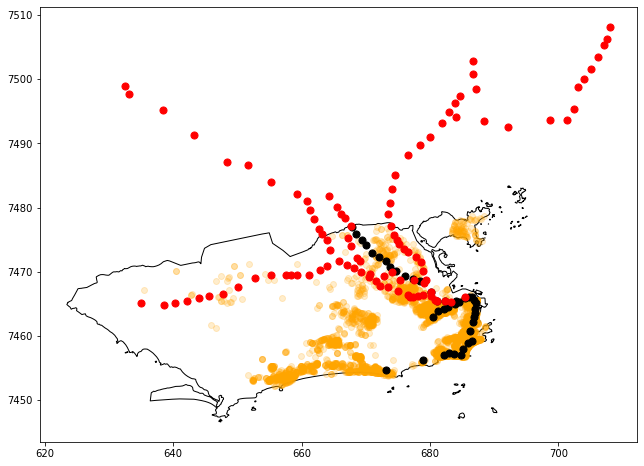

In [46]:
base = rj_munic.plot(color="white", edgecolor="black", figsize=(15,8))
geo_dados.plot(ax=base,color= "orange", alpha=0.2)
metro.plot(ax=base,color= "black", markersize=50)
trem.plot(ax=base, color="red", markersize=50)

In [48]:
trem = trem[trem.within(rj_munic.iloc[0].geometry)]

<AxesSubplot:>

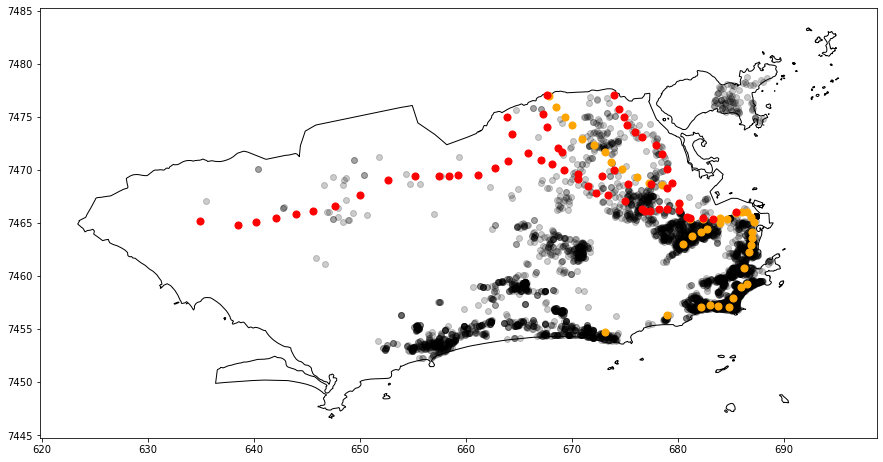

In [49]:
base = rj_munic.plot(color="white", edgecolor="black", figsize=(15,8))
geo_dados.plot(ax=base,color= "black", alpha=0.2)
metro.plot(ax=base,color= "orange", markersize=50)
trem.plot(ax=base, color="red", markersize=50)

In [50]:
estações_brt

,OBJECTID,Nome,Flg_Ativo,Status,X,Y,Flg_TransCarioca,Flg_TransBrasil,Flg_TransOeste,Flg_TransOlimpica,ChaveGeo,Data_Inc,Integra_Trem,Integra_Metro,Integra_Aeroporto,geometry
0,1,Santa Luzia,1,1,679342.4694,7.471500e+06,1,0,0,0,None,1970-01-01T00:00:00+00:00,0.0,0.0,0.0,POINT (-43.25244 -22.85513)
1,2,Maré,1,1,680236.1565,7.472380e+06,1,0,0,0,None,1970-01-01T00:00:00+00:00,0.0,0.0,0.0,POINT (-43.24383 -22.84709)
2,3,Cardoso de Moraes - Viúva Garcia,1,1,678744.0560,7.471252e+06,1,0,0,0,None,1970-01-01T00:00:00+00:00,0.0,0.0,0.0,POINT (-43.25824 -22.85743)
3,4,Penha I,1,1,676833.5642,7.473029e+06,1,0,0,0,None,1970-01-01T00:00:00+00:00,0.0,0.0,0.0,POINT (-43.27706 -22.84158)
4,5,Penha II,1,1,676873.5062,7.472977e+06,1,0,0,0,None,1970-01-01T00:00:00+00:00,0.0,0.0,0.0,POINT (-43.27666 -22.84205)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,158,Marechal Fontenelle,1,1,664095.9896,7.468251e+06,0,0,0,1,None,1970-01-01T00:00:00+00:00,0.0,0.0,0.0,POINT (-43.40065 -22.88602)
157,159,Marechal Mallet,1,1,663615.1812,7.469374e+06,0,0,0,1,None,1970-01-01T00:00:00+00:00,0.0,0.0,0.0,POINT (-43.40545 -22.87593)
158,160,Magalhães Bastos,1,1,662717.0295,7.470178e+06,0,0,0,1,None,1970-01-01T00:00:00+00:00,0.0,0.0,0.0,POINT (-43.41429 -22.86876)
159,161,Vila Militar,1,1,664022.2312,7.470841e+06,0,0,0,1,None,1970-01-01T00:00:00+00:00,1.0,0.0,0.0,POINT (-43.40164 -22.86265)


In [51]:
estações_brt.crs

{'init': 'epsg:4326'}

In [52]:
estações_brt = estações_brt.to_crs("+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs")
estações_brt.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

In [53]:
estações_brt = estações_brt[estações_brt.within(rj_munic.iloc[0].geometry)]

<AxesSubplot:>

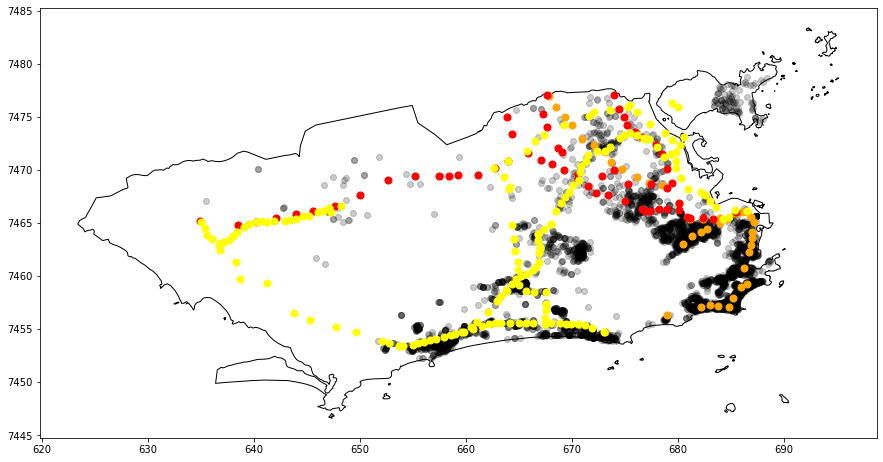

In [54]:
base = rj_munic.plot(color="white", edgecolor="black", figsize=(15,8))
geo_dados.plot(ax=base,color= "black", alpha=0.2)
metro.plot(ax=base,color= "orange", markersize=50)
trem.plot(ax=base, color="red", markersize=50)
estações_brt.plot(ax=base, color="yellow", markersize=50)

In [56]:
transporte = pd.concat([trem.geometry, metro.geometry, estações_brt.geometry], ignore_index = True)

In [57]:
transporte

0      POINT (676.866 7466.079)
1      POINT (663.964 7470.815)
2      POINT (662.792 7470.218)
3      POINT (661.119 7469.485)
4      POINT (659.274 7469.469)
                 ...           
257    POINT (664.056 7468.207)
258    POINT (663.576 7469.330)
259    POINT (662.677 7470.133)
260    POINT (663.983 7470.796)
261    POINT (664.181 7468.397)
Length: 262, dtype: geometry

In [60]:
geodados["Dist_transporte"] = geodados["geometry"].apply(lambda x: transporte.distance(x).min())

In [61]:
geodados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,dist_metro,Dist_transporte
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.622939,0.443193
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530741,3.642787
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.736973,0.641470
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.718039,0.422370
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.131159,0.214605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216),20.667831,2.129366
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944),18.189134,0.563492
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848),2.180300,2.180300
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417),2.558248,1.871081


In [63]:
geodados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,dist_metro,Dist_transporte
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671,-0.042684
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864,0.358735
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788,-0.031812
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794,-0.014628
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521,0.006363
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787,0.070240
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641,-0.103653
dist_metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000,0.261040
Dist_transporte,-0.042684,0.358735,-0.031812,-0.014628,0.006363,0.070240,-0.103653,0.261040,1.000000


In [64]:
area_rj = gpd.read_file("https://opendata.arcgis.com/datasets/a22768dc645043f5bdfd1affab888ded_0.geojson")

In [65]:
area_rj

,Sigla,ANO,legenda,OBJECTID,GRUPO,CLASSE,FORMACOES,ESTAGIO_SUCESSIONAL,SMAC_,ShapeSTArea,ShapeSTLength,geometry
0,Con,2016-06-01T00:00:00+00:00,Corpos d’água continentais,19722,Outros,Corpos d’água continentais,,,8684.889153,8684.889153,441.128326,"POLYGON ((-43.56564 -23.06173, -43.56674 -23.0..."
1,Con,2016-06-01T00:00:00+00:00,Corpos d’água continentais,19723,Outros,Corpos d’água continentais,,,2209.343321,2209.343321,241.436403,"POLYGON ((-43.59625 -23.04796, -43.59635 -23.0..."
2,Con,2016-06-01T00:00:00+00:00,Corpos d’água continentais,19724,Outros,Corpos d’água continentais,,,17015.344086,17015.344086,468.728882,"POLYGON ((-43.59737 -23.04845, -43.59721 -23.0..."
3,Con,2016-06-01T00:00:00+00:00,Corpos d’água continentais,19725,Outros,Corpos d’água continentais,,,17597.540796,17597.540796,916.463204,"POLYGON ((-43.60748 -23.04327, -43.60768 -23.0..."
4,Vg,2016-06-01T00:00:00+00:00,Vegetação gramíneo-lenhosa,19726,Antropismo,Vegetação gramíneo-lenhosa,,,11834.876012,11834.876012,605.329142,"POLYGON ((-43.57116 -23.05929, -43.57113 -23.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9856,V2s,2016-06-01T00:00:00+00:00,"Floresta Ombrófila Densa, Estágio Médio",29578,Cobertura Natural,Floresta Ombrófila Densa,Submontana,Vegetação Secundária Estágio Médio,121300.629955,121300.629955,2914.467452,"POLYGON ((-43.56521 -23.06808, -43.56486 -23.0..."
9857,V2s,2016-06-01T00:00:00+00:00,"Floresta Ombrófila Densa, Estágio Médio",29579,Cobertura Natural,Floresta Ombrófila Densa,Submontana,Vegetação Secundária Estágio Médio,76260.650001,76260.650001,2681.657808,"POLYGON ((-43.55646 -23.07023, -43.55638 -23.0..."
9858,V2s,2016-06-01T00:00:00+00:00,"Floresta Ombrófila Densa, Estágio Médio",29580,Cobertura Natural,Floresta Ombrófila Densa,Submontana,Vegetação Secundária Estágio Médio,8171.826153,8171.826153,388.221884,"POLYGON ((-43.56445 -23.06981, -43.56432 -23.0..."
9859,V2s,2016-06-01T00:00:00+00:00,"Floresta Ombrófila Densa, Estágio Médio",29581,Cobertura Natural,Floresta Ombrófila Densa,Submontana,Vegetação Secundária Estágio Médio,34221.485938,34221.485938,949.728601,"POLYGON ((-43.55503 -23.07104, -43.55510 -23.0..."


In [66]:
area_rj = area_rj.to_crs("+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs")
area_rj.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

<AxesSubplot:>

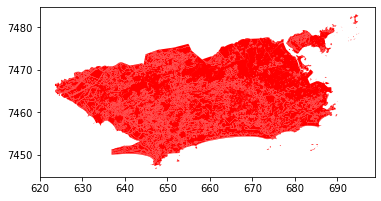

In [68]:
area_rj.plot(color="red")

In [73]:
area_rj["legenda"].value_counts()

Vegetação arbórea não florestal                                     3492
Vegetação gramíneo-lenhosa                                          1993
Áreas Urbanas                                                        636
Floresta Ombrófila Densa, Estágio Inicial                            627
Afloramento Rochoso                                                  471
Uso agrícola, Lavoura Permanente                                     438
Floresta Ombrófila Densa, Estágio Médio                              406
Corpos d’água continentais                                           388
Reflorestamento                                                      252
Formação Pioneira com influência flúvio-lacustre, Brejo herbáceo     210
Uso agrícola, Lavoura Temporária                                     164
Formação Pioneira com influência flúvio-marinha, Manguezal           161
Formação Pioneira com influência flúvio-marinha, Campo Salino        150
Solo exposto                                       

In [74]:
praias = area_rj[area_rj["legenda"] == "Praia"]

In [75]:
praias

,Sigla,ANO,legenda,OBJECTID,GRUPO,CLASSE,FORMACOES,ESTAGIO_SUCESSIONAL,SMAC_,ShapeSTArea,ShapeSTLength,geometry
21,P,2016-06-01T00:00:00+00:00,Praia,19743,Outros,Praia,,,3042.036027,3042.036027,257.566546,"POLYGON ((646.827 7448.941, 646.810 7448.943, ..."
22,P,2016-06-01T00:00:00+00:00,Praia,19744,Outros,Praia,,,2155.254100,2155.254100,274.902433,"POLYGON ((646.892 7449.217, 646.887 7449.216, ..."
23,P,2016-06-01T00:00:00+00:00,Praia,19745,Outros,Praia,,,4818.129025,4818.129025,445.290523,"POLYGON ((646.763 7449.309, 646.756 7449.310, ..."
24,P,2016-06-01T00:00:00+00:00,Praia,19746,Outros,Praia,,,943641.805845,943013.628559,20812.932978,"POLYGON ((643.477 7450.196, 643.368 7450.209, ..."
25,P,2016-06-01T00:00:00+00:00,Praia,19747,Outros,Praia,,,194036.398225,193775.000544,8011.541332,"MULTIPOLYGON (((640.068 7452.090, 640.052 7452..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,P,2016-06-01T00:00:00+00:00,Praia,28524,Outros,Praia,,,1700.456496,1695.159233,320.269766,"POLYGON ((631.225 7459.078, 631.223 7459.081, ..."
8803,P,2016-06-01T00:00:00+00:00,Praia,28525,Outros,Praia,,,1143.503857,1141.661674,233.741400,"POLYGON ((631.276 7459.030, 631.283 7459.043, ..."
8804,P,2016-06-01T00:00:00+00:00,Praia,28526,Outros,Praia,,,1761.696877,1748.397907,464.721295,"POLYGON ((631.281 7459.021, 631.280 7459.021, ..."
8805,P,2016-06-01T00:00:00+00:00,Praia,28527,Outros,Praia,,,889.078399,884.973684,250.294860,"POLYGON ((631.535 7459.154, 631.509 7459.160, ..."


In [76]:
geodados["Dist_praia"] = geodados["geometry"].apply(lambda x: praias.distance(x).min())

In [79]:
geodados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,dist_metro,Dist_transporte,Dist_praia
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671,-0.042684,-0.290745
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864,0.358735,0.560706
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788,-0.031812,-0.317743
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794,-0.014628,-0.185830
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521,0.006363,-0.196555
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787,0.070240,-0.104571
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641,-0.103653,-0.361520
dist_metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000,0.261040,0.187804
Dist_transporte,-0.042684,0.358735,-0.031812,-0.014628,0.006363,0.070240,-0.103653,0.261040,1.000000,0.230640
Dist_praia,-0.290745,0.560706,-0.317743,-0.185830,-0.196555,-0.104571,-0.361520,0.187804,0.230640,1.000000
